In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
deliveries = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Data Science/Data Analysis/IPL_Data_Analysis/deliveries.csv")
matches = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Data Science/Data Analysis/IPL_Data_Analysis/matches.csv")

In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,11415,2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
1,11414,2019,Visakhapatnam,10/05/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
2,11413,2019,Visakhapatnam,08/05/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
3,11412,2019,Chennai,07/05/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
4,11346,2019,Mohali,05/05/2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford


##**Most Runs**

In [6]:
batsman_runs = deliveries.groupby(deliveries.batsman).batsman_runs.sum()
most_runs = batsman_runs.sort_values(ascending=False).head(10)
most_runs

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

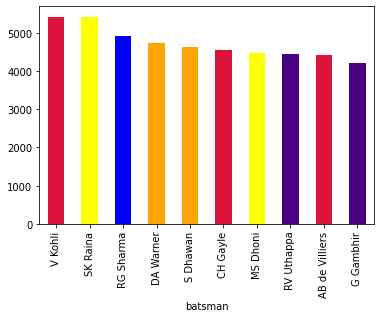

In [7]:
most_runs.plot(kind='bar',color=['crimson','yellow','blue','orange','orange','crimson','yellow','indigo','crimson','indigo'])

Observations :
1. Virat Kohli & Suresh Raina are the leading Run Scorers in IPL so far with a very marginal difference.
2. There is close to 10% difference between the 2nd & 3rd Top Scorer.
3. Only 3 foreign players are in Top 10 Run Scorers
4. RCB has 3 Players in Top 10 leading Scorers

##**Most Wickets**

In [8]:
bowler_wickets = deliveries.groupby(deliveries.bowler).player_dismissed.count()
most_wickets = bowler_wickets.sort_values(ascending=False).head(10)
most_wickets

bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
Name: player_dismissed, dtype: int64

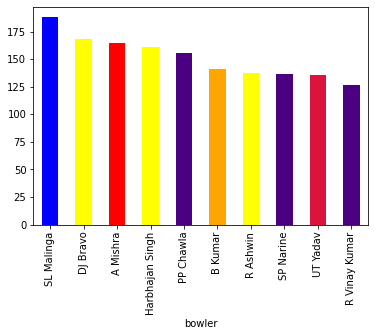

In [9]:
most_wickets.plot(kind='bar',color=['blue','yellow','red','yellow','indigo','orange','yellow','indigo','crimson','indigo'])

Observations :
1. Lasith Malinga is the most successfull Bowler of All-time
2. Both Pacers and Spinners seem to have dominated, there are 5 spinners & 5 fast bowlers in top 10
3. CSK & KKR have 3 Bowlers each in Top 10 

##**Most Catches**

In [10]:
deliveries.head()
catches = deliveries.fielder.value_counts()
most_catches = catches.head(10)
most_catches

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
Name: fielder, dtype: int64

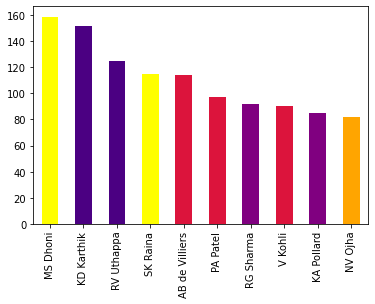

In [11]:
most_catches.plot(kind='bar',color=['yellow','indigo','indigo','yellow','crimson','crimson','purple','crimson','purple','orange'])

Observations :
1. As Expected, three wicket-keepers are at the top of the list of Most Catches
2. Suresh Raina tops the list of most catches by a non-wk
3. 5 Wicket-Keepers are in Top 10 list of most catches.

##**Most Man of the Match Award**

In [12]:
man_of_match = matches["player_of_match"].value_counts().head(10)
man_of_match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

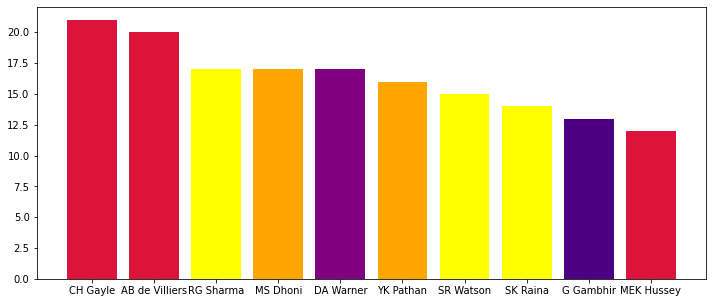

In [13]:
plt.figure(figsize=(12,5))
plt.bar(list(man_of_match.keys()),list(man_of_match),color=['crimson','crimson','yellow','orange','purple','orange','yellow','yellow','indigo','crimson'])
plt.show()

Observations :
1. "The Universe Boss" Chris Gayle has the most no. of Man of the match closely followed by his team mate from RCB, AB de Villers
2. NO BOWLER has made it to the list of Most Man of the Matches 


##**Match Results**

In [14]:
match_results = matches['result'].value_counts()
match_results

normal       743
tie            9
no result      4
Name: result, dtype: int64

Observations :
1. An astonishing 99% Matches had a Normal Result. IPL is oraganised between March to May which are summer months in India and with a very little possibilty of rain & other disturbences. 

##**Matches Won**

In [15]:
match_wins = matches["winner"].value_counts().head(10)
match_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Name: winner, dtype: int64

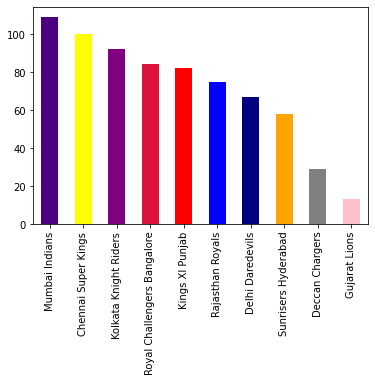

In [16]:
match_wins.plot(kind='bar',color=['indigo','yellow','purple','crimson','red','blue','navy','orange','grey','pink'])

Observations :
1. NO Suprises! Mumbai Indians and Chennai Super Kings are the two most Successfull teams in IPL's History.
2. However,a point to note  is that Chennai was not part of IPL 2 years.


##**Most Toss Wins**

In [17]:
most_toss_wins = matches["toss_winner"].value_counts().head(10)
most_toss_wins

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Name: toss_winner, dtype: int64

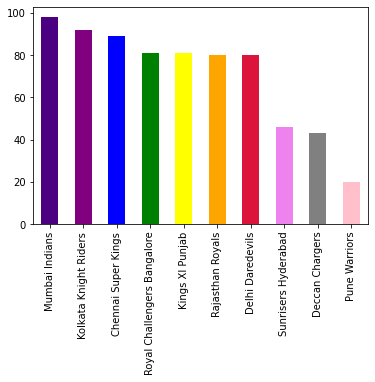

In [18]:
most_toss_wins.plot(kind='bar',color=["indigo","purple","blue","green","yellow","orange",'crimson',"violet","grey","pink"])

##**Most wins Batting First**

In [19]:
batting_first = matches[matches["win_by_runs"] != 0]
batting_first['win_by_runs'].value_counts().head(10)

14    13
10    11
4     11
1     10
13     9
23     9
7      9
9      9
22     9
15     9
Name: win_by_runs, dtype: int64

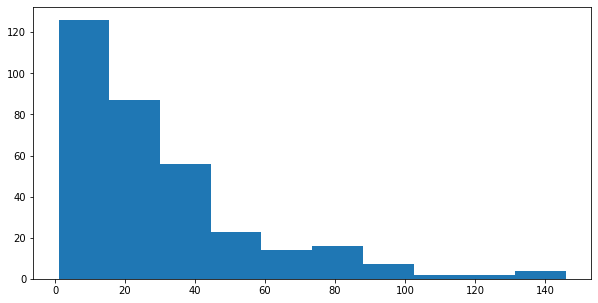

In [20]:
plt.figure(figsize=(10,5))
plt.hist(batting_first['win_by_runs'])
plt.show()

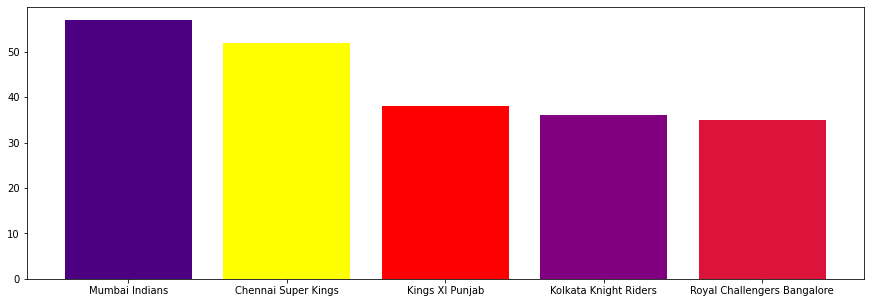

In [21]:
plt.figure(figsize=(15,5))
plt.bar(list(batting_first['winner'].value_counts()[:5].keys()),list(batting_first['winner'].value_counts()[:5]),color=["indigo","yellow","red",'purple',"crimson"])
plt.show()

##**Most wins Batting Second**

In [22]:
batting_second = matches[matches['win_by_wickets'] != 0]
batting_second['win_by_wickets'].value_counts()

6     85
7     80
5     71
8     54
4     41
9     37
3     18
10    11
2      6
1      3
Name: win_by_wickets, dtype: int64

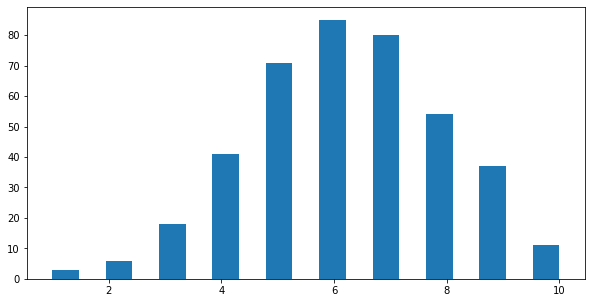

In [23]:
plt.figure(figsize=(10,5))
plt.hist(batting_second['win_by_wickets'],bins=19)
plt.show()

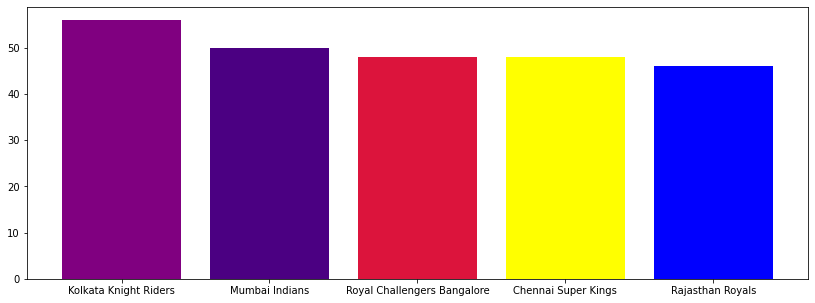

In [24]:
plt.figure(figsize=(14,5))
plt.bar(list(batting_second['winner'].value_counts()[:5].keys()),list(batting_second['winner'].value_counts()[:5]),color=['purple','indigo','crimson','yellow','blue',])
plt.show()

**Observations :**
1. Mumbai Indians perform well in both situations.
2. KKR performs well Batting second compared to Batting First
3. Suprisingly, CSK performs well while setting a target & dosen't perform up to the mark while chasing

##**No. of Matches Played**

In [25]:
no_of_matches = matches['season'].value_counts()
no_of_matches

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

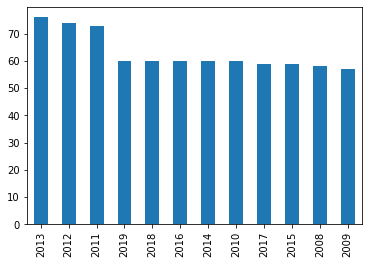

In [26]:
no_of_matches.plot(kind='bar')

**Observations :**
1. Pune Warriors India and Kochi Tuskers Kerela were added in 4th Season(2011) of IPL,which is why there is a increase in no. of matches pplayed. However, each team only played 14 matches before the Qualifiers.
2. Kochi Tuskers Kerela were removed from 5th edition(2012). However,the no. of matches played are more than previous year because each played 16 matches before Qualifiers as compared to 14 Matches in the earliers edition.

##**Popular Venues**

In [73]:
venues = matches['venue'].value_counts().head(10)
venues

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Dr DY Patil Sports Academy                    17
Name: venue, dtype: int64

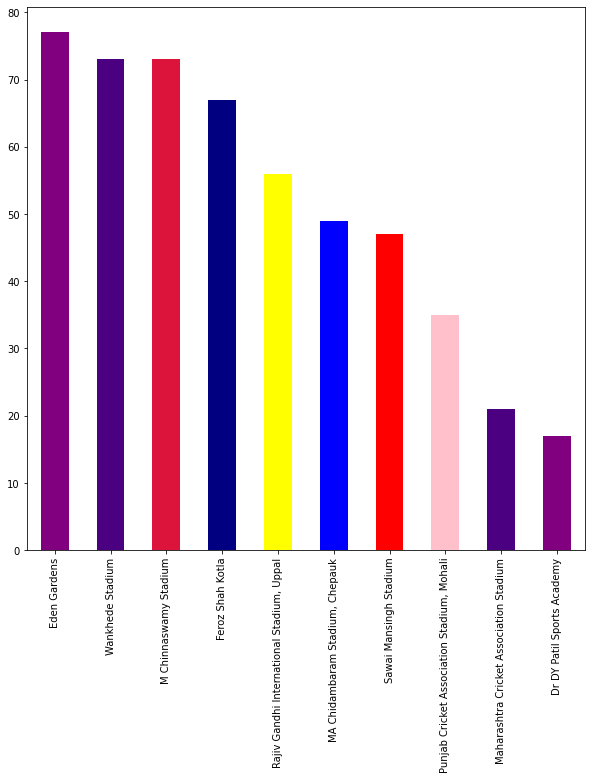

In [74]:
plt.figure(figsize=(10,10))
venues.plot(kind='bar',color=['purple','indigo','crimson','navy','yellow','blue','red','pink','indigo'])

**Observation :**
1. Eden Gardens, M Chinnaswamy, Wankhede, and Feroz Shah Kotla are stadiums with most matches
2. Mostly eliminators, qualifiers and final of each season are played in these locations

##**% Wins by teams who won the toss**

In [ ]:
matches_toss = np.sum(matches['toss_winner'] == matches['winner'])
total_matches = matches['id'].count()

In [ ]:
percent = round((matches_toss/total_matches) *100,2) 
print(str(percent) + str(" %"))

**Observations :**
1. The % is close to 50,to which we can conclude that toss dosen't play that much important role in IPL